# Predicting World Series Winner using Machine Learning

This notebook will attempt at predicting the World Series Winner using various Python-based machine learning and data science libraries. The end result will be a deployable machine learning model capable of predicting which team in Baseball will win the World Series based on their team statistics.

Methodology for this project:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Deployment
8. A/B Testing
9. Results Analysis
10. Retraining

## 1. Problem Statement

> Can we predict the World Series Champion for each year?

## 2. Data

The original data came from the Lahman's Baseball Database: http://www.seanlahman.com/baseball-archive/statistics/

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a team will win the World Series during the initial proof of concept stage, then we will continue into implementation.

## 4. Features

`Teams.csv` contains all the teams yearly stats and standings from 1871 to 2019. 

**Data Dictionary** 

1. yearID - Year
2. lgID - League
3. teamID - Team
4. franchID - Franchise (links to TeamsFranchise table)
5. divID - Team's division
6. Rank - Position in final standings
7. G - Games played
8. GHome - Games played at home
9. W - Wins
10. L - Losses
11. DivWin - Division Winner (Y or N)
12. WCWin - Wild Card Winner (Y or N)
13. LgWin - League Champion(Y or N)
14. WSWin - World Series Winner (Y or N)
15. R - Runs scored
16. AB - At bats
17. H - Hits by batters
18. 2B - Doubles
19. 3B - Triples
20. HR - Homeruns by batters
21. BB - Walks by batters
22. SO - Strikeouts by batters
23. SB - Stolen bases
24. CS - Caught stealing
25. HBP - Batters hit by pitch
26. SF - Sacrifice flies
27. RA - Opponents runs scored
28. ER - Earned runs allowed
29. ERA - Earned run average
30. CG - Complete games
31. SHO - Shutouts
32. SV - Saves
33. IPOuts - Outs Pitched (innings pitched x 3)
34. HA - Hits allowed
35. HRA - Homeruns allowed
36. BBA - Walks allowed
37. SOA - Strikeouts by pitchers
38. E - Errors
39. DP - Double Plays
40. FP - Fielding  percentage
41. name - Team's full name
42. park - Name of team's home ballpark
43. attendance - Home attendance total
44. BPF - Three-year park factor for batters
45. PPF - Three-year park factor for pitchers
46. teamIDBR - Team ID used by Baseball Reference website
47. teamIDlahman45 - Team ID used in Lahman database version 4.5
48. teamIDretro - Team ID used by Retrosheet

## Python Libraries Setup

Import Pandas, Matplotlib, Numpy, and Seaborn.

In [2]:
# Import tools needed

# Exploratory Data Analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [4]:
df = pd.read_csv("Teams.csv")
df.shape (rows, columns)

(2925, 48)

## Exploratory Data Analysis

In [6]:
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [7]:
df.tail()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,...,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,...,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,...,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,...,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR
2924,2019,NL,WAS,WSN,E,2,162,81.0,93,69,...,111,0.985,Washington Nationals,Nationals Park,2259781.0,106,104,WSN,MON,WAS


In [13]:
df["WSWin"].value_counts()

N    2448
Y     120
Name: WSWin, dtype: int64

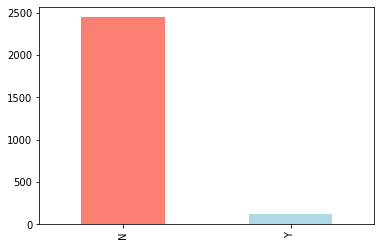

In [14]:
df["WSWin"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2925 non-null   int64  
 1   lgID            2875 non-null   object 
 2   teamID          2925 non-null   object 
 3   franchID        2925 non-null   object 
 4   divID           1408 non-null   object 
 5   Rank            2925 non-null   int64  
 6   G               2925 non-null   int64  
 7   Ghome           2526 non-null   float64
 8   W               2925 non-null   int64  
 9   L               2925 non-null   int64  
 10  DivWin          1380 non-null   object 
 11  WCWin           744 non-null    object 
 12  LgWin           2897 non-null   object 
 13  WSWin           2568 non-null   object 
 14  R               2925 non-null   int64  
 15  AB              2925 non-null   int64  
 16  H               2925 non-null   int64  
 17  2B              2925 non-null   i

In [16]:
df.isna().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
G                    0
Ghome              399
W                    0
L                    0
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   1
SO                  16
SB                 126
CS                 832
HBP               1158
SF                1541
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                   0
FP                   0
name                 0
park                34
attendance         279
BPF        

In [17]:
df.describe()

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2925.000000,2925.000000,2925.000000,2526.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2.646000e+03,2925.000000,2925.000000
mean,1957.599316,4.061538,150.808205,78.585511,75.004103,75.004103,684.623248,5158.655385,1348.460513,229.707009,...,1348.235556,105.217778,475.982906,757.465641,183.241026,133.540513,0.965985,1.390692e+06,100.193162,100.214701
std,42.505220,2.303934,22.878728,4.617874,17.522547,17.267846,134.547497,738.885194,216.074082,58.699191,...,216.128882,60.644155,129.963105,315.919210,108.024341,35.169866,0.029253,9.604662e+05,4.924598,4.851388
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,...,49.000000,0.000000,1.000000,0.000000,47.000000,0.000000,0.761000,6.088000e+03,60.000000,60.000000
25%,1921.000000,2.000000,154.000000,77.000000,66.000000,66.000000,615.000000,5146.000000,1303.000000,195.000000,...,1291.000000,49.000000,431.000000,510.000000,114.000000,117.000000,0.966000,5.538080e+05,97.000000,97.000000
50%,1966.000000,4.000000,159.000000,81.000000,77.000000,76.000000,692.000000,5408.000000,1393.000000,234.000000,...,1392.000000,113.000000,496.000000,762.000000,143.000000,141.000000,0.977000,1.200656e+06,100.000000,100.000000
75%,1995.000000,6.000000,162.000000,81.000000,87.000000,87.000000,765.000000,5522.000000,1466.000000,272.000000,...,1470.000000,153.000000,554.000000,992.000000,210.000000,157.000000,0.981000,2.081326e+06,103.000000,103.000000
max,2019.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,305.000000,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


### World Series Winner based on Win Percentage